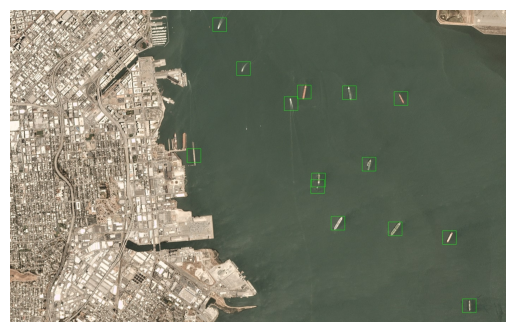

In [2]:
import cv2
from matplotlib import pyplot as plt

# Load and display a sample image
image_path = "/content/1*ijI4jVnpUwnKB30Sdcec7A.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image)
plt.axis('off')
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = (256, 256, 3)  # Example input shape
num_classes = 10  # Example number of classes

# Create the model
model = create_model(input_shape, num_classes)
model.summary()  # Print model summary


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
import cv2
import numpy as np

def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load image
    image = cv2.imread(image_path)
    # Resize image
    image = cv2.resize(image, target_size)
    # Normalize pixel values to [0, 1]
    image = image.astype('float32') / 255.0
    # Expand dimensions to make it suitable for model input (add batch dimension)
    image = np.expand_dims(image, axis=0)
    return image


In [10]:
test_image_path = '/content/1*ijI4jVnpUwnKB30Sdcec7A.jpg'
test_image = load_and_preprocess_image(test_image_path)

In [11]:
test_label = 0

In [16]:
# Ensure that the test image has the correct shape and format
print("Test Image Shape:", test_image.shape)

# Check if the model expects inputs in batch format
print("Model Input Shape:", model.input_shape)

# If the model expects batch input, add a batch dimension to the test image
if len(model.input_shape) == 4:  # Assuming input shape is (batch_size, height, width, channels)
    test_image_batch = np.expand_dims(test_image, axis=0)
    test_label_batch = np.expand_dims(test_label, axis=0)
else:
    test_image_batch = test_image
    test_label_batch = test_label



Test Image Shape: (1, 256, 256, 3)
Model Input Shape: (None, 256, 256, 3)


In [19]:
# If the model expects batch input, add a batch dimension to the test image
if len(model.input_shape) == 4:  # Assuming input shape is (batch_size, height, width, channels)
    test_image_batch = np.expand_dims(test_image, axis=0)
    test_label_batch = np.expand_dims(test_label, axis=0)
else:
    test_image_batch = test_image
    test_label_batch = test_label



In [21]:
print("Model Input Shape:", model.input_shape)
print("Test Image Batch Shape:", test_image_batch.shape)


Model Input Shape: (None, 256, 256, 3)
Test Image Batch Shape: (1, 1, 256, 256, 3)


In [22]:
test_image_batch = np.squeeze(test_image_batch, axis=0)

In [24]:
import tensorflow.keras.backend as K
K.clear_session()

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [26]:
test_loss, test_accuracy = model.evaluate(test_image_batch, test_label_batch)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 338ms/step - loss: 2.2909 - accuracy: 0.0000e+00
Test Loss: 2.2909414768218994
Test Accuracy: 0.0


POST PROCESSING

In [28]:
model_prediction = model.predict(test_image_batch)


1/1 [==============================] - 0s 145ms/step


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def threshold_prediction(prediction, threshold=0.5):
    prediction_thresholded = (prediction > threshold).astype(np.uint8)
    return prediction_thresholded

prediction_thresholded = threshold_prediction(model_prediction)


VISUALIZATION

In [32]:
import matplotlib.pyplot as plt

def visualize_prediction(image, prediction):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Satellite Image')
    plt.axis('off')


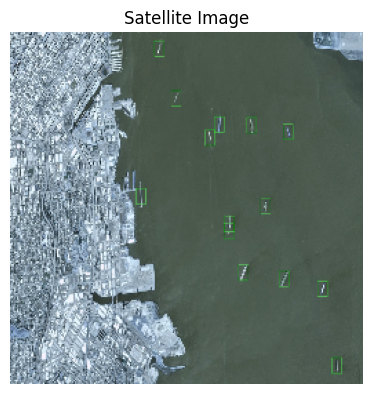

In [33]:
visualize_prediction(test_image_batch[0], prediction_thresholded[0])